In [5]:
import sys,os
sys.path.append('/Users/neelanpather/dev/disent/')

In [58]:

def allowed_factor(factor, num_clusters=2) -> np.ndarray:
    """
    Convert an index to a position (or convert a list of indices to a list of positions)
    - indices are integers < size
    - positions are lists of integers, with each element < their corresponding factor size
    """
    (x, y) = factor
    #Q1
    if (x in range(0, 4)) and (y in range(0, 4)):
        allowed_x = x
        allowed_y = y
    #Q2 to Q1
    elif (x in range(0, 4)) and (y in range(4, 8)):
            allowed_x = x
            allowed_y = y - 4
    #Q3 to Q1
    elif (x in range(4, 8)) and (y in range(0, 4)):
            allowed_x = x - 4
            allowed_y = y
    #Q4
    elif (x in range(4, 8)) and (y in range(4, 8)):
        allowed_x = x
        allowed_y = y
    else:
        allowed_x = 999
        allowed_y = 999

    x_ = allowed_x
    y_ = allowed_y

    if num_clusters == 4:

        # splitting Q1
        if (x_ in range(0, 2)) and (y_ in range(0, 2)):
                allowed_x = x_
                allowed_y = y_
        elif (x in range(0, 2)) and (y in range(2, 4)):
                allowed_x = x_
                allowed_y = y_ - 2
        elif (x in range(2, 4)) and (y in range(0, 2)):
                allowed_x = x_ - 2
                allowed_y = y_ 
        elif (x in range(2, 4)) and (y in range(2, 4)):
                allowed_x = x_ - 2
                allowed_y = y_
        # splitting Q4
        if (x_ in range(4, 6)) and (y_ in range(4, 6)):
                allowed_x = x_
                allowed_y = y_
        elif (x in range(4, 6)) and (y in range(6, 8)):
                allowed_x = x_
                allowed_y = y_ - 2
        elif (x in range(6, 8)) and (y in range(4, 6)):
                allowed_x = x_ - 2
                allowed_y = y_ 
        elif (x in range(6, 8)) and (y in range(6, 8)):
                allowed_x = x_
                allowed_y = y_
        #else:
                #allowed_x = 999
                #allowed_y = 999      

    allowed_factor = (allowed_x, allowed_y)



    return allowed_factor

In [7]:
import pytorch_lightning as pl
import matplotlib.pyplot as plt
import numpy as np
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from disent.data.groundtruth import XYSquaresData, GroundTruthData
from disent.dataset.groundtruth import GroundTruthDataset
from disent.frameworks.vae import BetaVae
from disent.model.ae import EncoderConv64, DecoderConv64, AutoEncoder
from disent.transform import ToStandardisedTensor
from disent.util import is_test_run

data: GroundTruthData = XYSquaresData(rgb=False)

In [61]:
factor4list = []
for i in range(0,63):    
    positions = np.unravel_index(i, (8, 8))
    factors = np.moveaxis(positions, source=0, destination=-1)
    
    allowed_factors2 = allowed_factor(factors, 2)
    allowed_factors4 = allowed_factor(allowed_factors2, 4)
    factor4list.append(allowed_factors4)
    print(factors, allowed_factors2, allowed_factors4)

[0 0] (0, 0) (0, 0)
[0 1] (0, 1) (0, 1)
[0 2] (0, 2) (0, 0)
[0 3] (0, 3) (0, 1)
[0 4] (0, 0) (0, 0)
[0 5] (0, 1) (0, 1)
[0 6] (0, 2) (0, 0)
[0 7] (0, 3) (0, 1)
[1 0] (1, 0) (1, 0)
[1 1] (1, 1) (1, 1)
[1 2] (1, 2) (1, 0)
[1 3] (1, 3) (1, 1)
[1 4] (1, 0) (1, 0)
[1 5] (1, 1) (1, 1)
[1 6] (1, 2) (1, 0)
[1 7] (1, 3) (1, 1)
[2 0] (2, 0) (0, 0)
[2 1] (2, 1) (0, 1)
[2 2] (2, 2) (0, 2)
[2 3] (2, 3) (0, 3)
[2 4] (2, 0) (0, 0)
[2 5] (2, 1) (0, 1)
[2 6] (2, 2) (0, 2)
[2 7] (2, 3) (0, 3)
[3 0] (3, 0) (1, 0)
[3 1] (3, 1) (1, 1)
[3 2] (3, 2) (1, 2)
[3 3] (3, 3) (1, 3)
[3 4] (3, 0) (1, 0)
[3 5] (3, 1) (1, 1)
[3 6] (3, 2) (1, 2)
[3 7] (3, 3) (1, 3)
[4 0] (0, 0) (0, 0)
[4 1] (0, 1) (0, 1)
[4 2] (0, 2) (0, 0)
[4 3] (0, 3) (0, 1)
[4 4] (4, 4) (4, 4)
[4 5] (4, 5) (4, 5)
[4 6] (4, 6) (4, 4)
[4 7] (4, 7) (4, 5)
[5 0] (1, 0) (1, 0)
[5 1] (1, 1) (1, 1)
[5 2] (1, 2) (1, 0)
[5 3] (1, 3) (1, 1)
[5 4] (5, 4) (5, 4)
[5 5] (5, 5) (5, 5)
[5 6] (5, 6) (5, 4)
[5 7] (5, 7) (5, 5)
[6 0] (2, 0) (0, 0)
[6 1] (2, 1) (0, 1)


In [54]:
x_t = allowed_factors2[0]
y_t = allowed_factors2[1]
if (x_t in range(0, 2)) and (y_t in range(0, 2)):
    print('working')

working


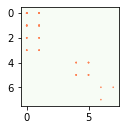

In [71]:
from matplotlib.patches import Circle
base = np.zeros((8,8))
f = plt.figure()
f1 = f.add_subplot(2,2, 1)
plt.imshow(np.ones(base.shape),cmap='Greens')

for pos in factor4list:
    #factor4list
    circ = Circle((pos[0],pos[1]),0.025, color='coral')
    f1.add_patch(circ)


In [9]:
(data._placements, data._placements) * data._num_squares

(8, 8)

In [30]:
data.factor_sizes

(8, 8)

In [12]:
data._num_squares

1

In [13]:
 ('x_R', 'y_R', 'x_G', 'y_G', 'x_B', 'y_B')[:data._num_squares*2]

('x_R', 'y_R')

In [14]:
(8,8)*3

(8, 8, 8, 8, 8, 8)

In [15]:
(data._placements, data._placements)

(8, 8)

In [18]:
factors = data.idx_to_pos([,7])
print(factors)

[[0 7]
 [0 7]]


In [22]:
from disent.util import iter_chunks
next(iter_chunks(factors, 2))

[array([0, 7]), array([0, 7])]

In [24]:
offset = data._offset
print('offset: ', offset)
space = data._spacing
print('space: ', space)
size = data._square_size
print('size: ', size)

offset:  0
space:  8
size:  8


In [27]:
for i, (fx, fy) in enumerate(iter_chunks(factors, 2)):
    print('i: ',i)
    print('fx: ', fx)
    print('fy: ', fy)
    print()
    x, y = offset + space * fx, offset + space * fy     
    print('x: ', x)
    print('y: ', y)
    print()

i:  0
fx:  [0 7]
fy:  [0 7]

x:  [ 0 56]
y:  [ 0 56]



In [49]:
obs = np.zeros(data.observation_shape, dtype=np.uint8)
x = x[-1]
y = y[-1]
obs[y:y+size, x:x+size, :] = data._fill_value

In [85]:
data: GroundTruthData = XYSquaresData(num_squares=1, rgb=False, max_placements=1)
dataset: Dataset = GroundTruthDataset(data, transform=ToStandardisedTensor())
dataloader = DataLoader(dataset=dataset, batch_size=128, shuffle=False)

In [8]:
data.observation_shape

(64, 64, 1)

In [3]:
import torchvision

grid_img = torchvision.utils.make_grid(images,pad_value=1)

plt.imshow(np.transpose(grid_img, (1, 2, 0)))

NameError: name 'images' is not defined

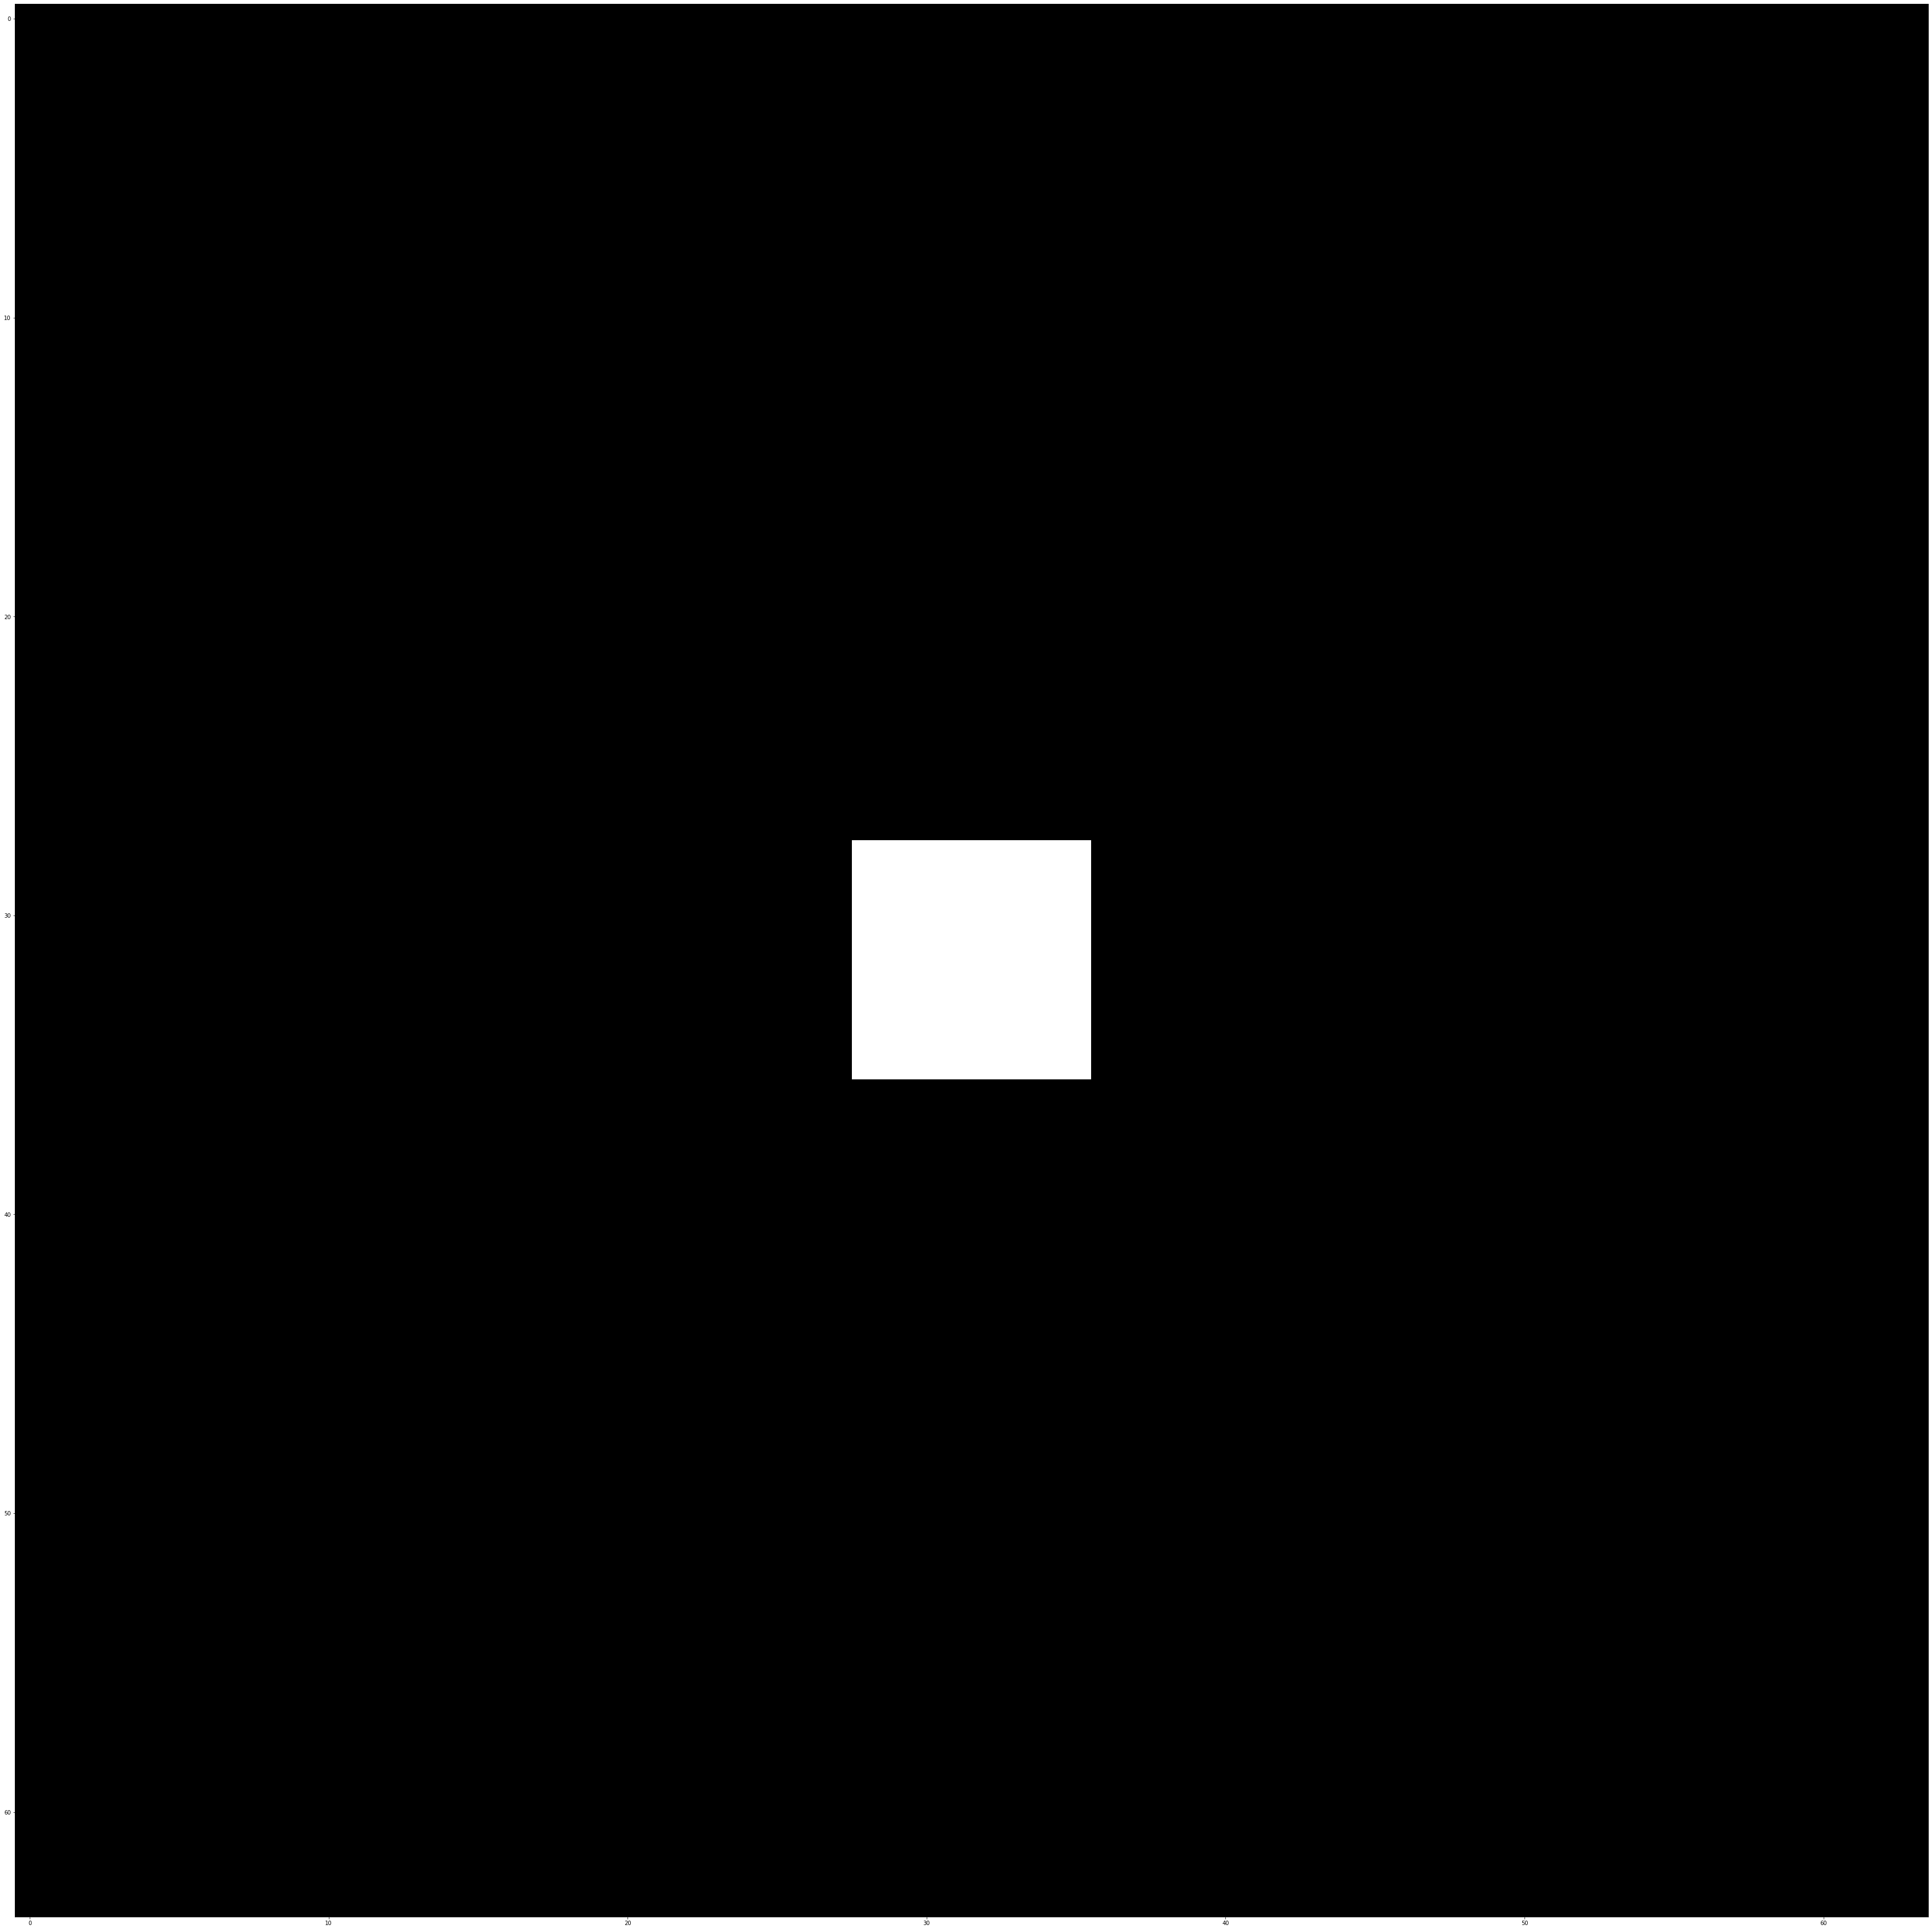

In [88]:
import torchvision

grid_img = torchvision.utils.make_grid(images,pad_value=1)

plt.imshow(np.transpose(grid_img, (1, 2, 0)))

In [46]:
grid_img.shape

torch.Size([3, 68, 4226])

In [92]:
data._offset

64

In [93]:
data._placements

1

In [28]:
factors

array([[0, 7],
       [0, 7]])